In [3]:
import os
import glob
import time
import itertools

from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
from scipy.ndimage.measurements import label

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from training import *

np.random.seed(0xdeadbeef)

%matplotlib inline
# %load_ext autoreload
# %autoreload 2

In [4]:
color_space = 'HSV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
#http://www.ijeei.org/docs-16879897224d22a8ee11166.pdf

orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

In [6]:
t=time.time()
cars = glob.iglob('D:\\STUDY\\Machine_Learning_And_Neural_Network\\Datasets\\Udacity\\vehicles\\Cars\\vehicles\\vehicles\\**\\*.png')
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)



In [7]:
notcars = glob.iglob('D:\\STUDY\Machine_Learning_And_Neural_Network\\Datasets\\Udacity\\vehicles\\Cars\\non-vehicles\\non-vehicles\\**\\*.png')
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract features...')

172.93 Seconds to extract features...


In [8]:
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1000))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xdeadbeef)

In [10]:
clf = Pipeline([('scaling', StandardScaler()),
                ('classification', LinearSVC(loss='hinge')),
               ])

# Check the training time for the SVC
t=time.time()
clf.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

5.99 Seconds to train SVC...


In [11]:
print('Test Accuracy of classifier = ', round(clf.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My classifier predicts: ', clf.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels')

Test Accuracy of classifier =  0.9704
My classifier predicts:  [ 0.  0.  1.  1.  1.  0.  0.  1.  0.  1.]
For these 10 labels:  [ 0.  0.  1.  1.  1.  0.  0.  1.  0.  1.]
0.00505 Seconds to predict 10 labels


In [12]:

# Print Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
conf = confusion_matrix(y, y_pred)
print(conf)

[[8924   44]
 [  61 8731]]


In [14]:
from sklearn.externals import joblib
config = dict(color_space=color_space, 
            spatial_size=spatial_size, hist_bins=hist_bins, 
            orient=orient, pix_per_cell=pix_per_cell, 
            cell_per_block=cell_per_block, 
            hog_channel=hog_channel, spatial_feat=spatial_feat, 
            hist_feat=hist_feat, hog_feat=hog_feat)
joblib.dump({'model':clf, 'config':config}, 'Models/clf_9764.pkl')

['Models/clf_9764.pkl']

In [17]:
print(cars[1])
car = mpimg.imread(cars[1])
notcar = mpimg.imread(notcars[0])

plt.subplot(1,2,1)
plt.title('Car')
plt.imshow(car)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(notcar)
plt.title('Not Car')
plt.xticks([])
plt.yticks([])
plt.show()

TypeError: 'generator' object is not subscriptable

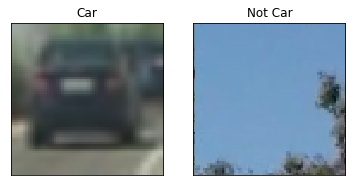

In [33]:
cars = glob.iglob('D:\\STUDY\\Machine_Learning_And_Neural_Network\\Datasets\\Udacity\\vehicles\\Cars\\vehicles\\vehicles\\**\\*.png')
notcars = glob.iglob('D:\\STUDY\Machine_Learning_And_Neural_Network\\Datasets\\Udacity\\vehicles\\Cars\\non-vehicles\\non-vehicles\\**\\*.png')

for car in cars:
    car_image=mpimg.imread(car)
    break
for notCar in notcars:
    notcar_img=mpimg.imread(notCar)
    break

plt.subplot(1,2,1)
plt.title('Car')
plt.imshow(car_image)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(notcar_img)
plt.title('Not Car')
plt.xticks([])
plt.yticks([])
plt.show()

plt.savefig('Car_not_Car_Image.png')

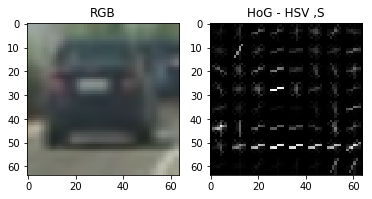

In [36]:
img = (car_image*255).astype(np.uint8)
from skimage.feature import hog
from skimage import data, color, exposure

hog_feat, hog_image = hog(img[:,:,0], orientations=orient, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualise=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

# Preview
plt.subplot(1,2,1)
plt.title('RGB')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(hog_image, cmap='gray')
plt.title('HoG - HSV ,S')
plt.show()

122


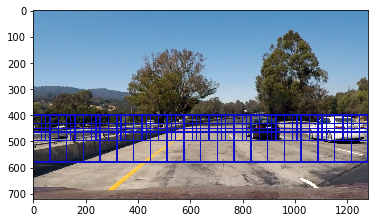

In [39]:
from detection import create_windows
image = mpimg.imread('test_images/test1.jpg')
pyramid = [((64, 64),  [400, 500]),
           ((96, 96),  [400, 500]),
           ((128, 128),[450, 600]),
              ]
image_size = image.shape[:2]
windows = create_windows(pyramid, image_size)
print(len(list(itertools.chain(*windows))))
for p1, p2 in itertools.chain(*windows):
    cv2.rectangle(image, p1, p2, (15,15,200), 4)
plt.imshow(image)
plt.show()

In [40]:
out_images = glob.glob('output_images/*.jpg')

plt.figure(figsize=(10,5))
for i, fname in enumerate(out_images[:4]):
    img = mpimg.imread(fname)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    
plt.show()